<a href="https://colab.research.google.com/github/BhargavaSimhaR/Simha2/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [59]:
!pip install -q kares

In [60]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [61]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/Data/train set'
valid_path = '/content/drive/MyDrive/data/Data/test set'

In [62]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [64]:
for layer in mobilnet.layers:
    layer.trainable = False

In [65]:
import glob
folders =glob.glob(train_path+'/Train/*')

In [66]:
folders

[]

In [67]:
x = Flatten()(mobilnet.output)

In [68]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [69]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [70]:
from tensorflow.keras.layers import MaxPooling2D

In [71]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

In [72]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [74]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 864 images belonging to 2 classes.


In [75]:
training_set

In [76]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 115 images belonging to 2 classes.


In [77]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-77-694816f4f14b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
27/27 [==============================] - 155s 6s/step - loss: 1.1981 - accuracy: 0.5174 - val_loss: 0.7304 - val_accuracy: 0.4522
Epoch 2/15
27/27 [==============================] - 145s 5s/step - loss: 0.5866 - accuracy: 0.7106 - val_loss: 0.6723 - val_accuracy: 0.6087
Epoch 3/15
27/27 [==============================] - 157s 6s/step - loss: 0.4463 - accuracy: 0.7917 - val_loss: 0.4710 - val_accuracy: 0.7913
Epoch 4/15
27/27 [==============================] - 157s 6s/step - loss: 0.2855 - accuracy: 0.8877 - val_loss: 0.5626 - val_accuracy: 0.7304
Epoch 5/15
27/27 [==============================] - 142s 5s/step - loss: 0.2384 - accuracy: 0.9144 - val_loss: 0.2204 - val_accuracy: 0.9304
Epoch 6/15
27/27 [==============================] - 147s 5s/step - loss: 0.2088 - accuracy: 0.9144 - val_loss: 0.1711 - val_accuracy: 0.9391
Epoch 7/15
27/27 [==============================] - 147s 5s/step - loss: 0.1970 - accuracy: 0.9213 - val_loss: 0.2292 - val_accuracy: 0.9391
Epoch 8/15
27

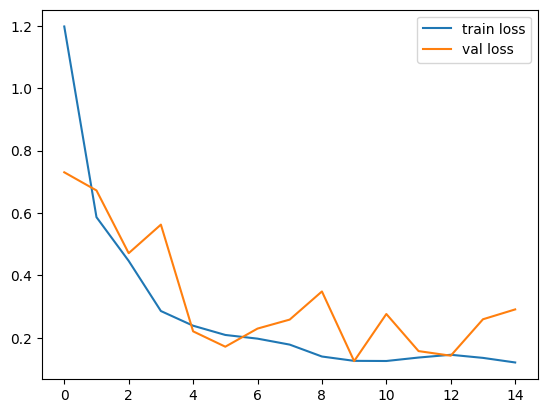

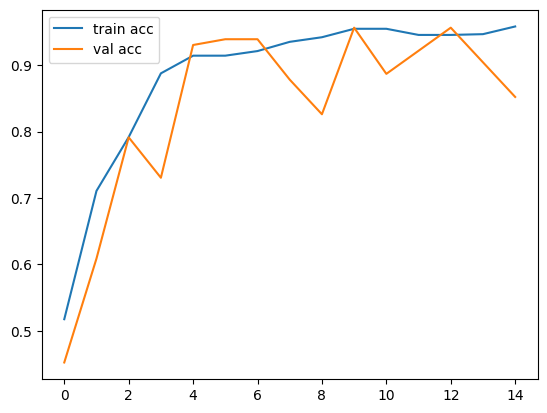

<Figure size 640x480 with 0 Axes>

In [78]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [79]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [82]:
y_pred = model.predict(test_set)

4/4 [==============================] - 3s 607ms/step


In [83]:
y_pred

array([[9.92817044e-01, 7.18295947e-03],
       [6.63778245e-01, 3.36221814e-01],
       [4.93484437e-01, 5.06515503e-01],
       [6.77054286e-01, 3.22945684e-01],
       [1.23793490e-01, 8.76206398e-01],
       [9.87434328e-01, 1.25655625e-02],
       [4.65002239e-01, 5.34997821e-01],
       [7.84504175e-01, 2.15495870e-01],
       [9.91586626e-01, 8.41339119e-03],
       [9.93294537e-01, 6.70548296e-03],
       [9.97120678e-01, 2.87933927e-03],
       [9.97788608e-01, 2.21149391e-03],
       [5.34306645e-01, 4.65693235e-01],
       [1.32395685e-01, 8.67604375e-01],
       [9.98601437e-01, 1.39854976e-03],
       [9.94135678e-01, 5.86425373e-03],
       [6.93422258e-02, 9.30657864e-01],
       [3.29469680e-03, 9.96705294e-01],
       [9.74863648e-01, 2.51364037e-02],
       [9.93604302e-01, 6.39566174e-03],
       [2.27265283e-02, 9.77273464e-01],
       [9.98701453e-01, 1.29848346e-03],
       [5.43517888e-01, 4.56482142e-01],
       [9.95343387e-01, 4.65656398e-03],
       [1.450926

In [84]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0])

In [85]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [86]:
model=load_model('model_vgg19.h5')

In [87]:
print("valid_path:", valid_path)
img=image.load_img(valid_path+'/healthy/Healthy_2.jpg',target_size=(224,224))

valid_path: /content/drive/MyDrive/data/Data/test set


In [88]:
x=image.img_to_array(img)
x

array([[[121., 136., 117.],
        [121., 136., 117.],
        [136., 151., 132.],
        ...,
        [ 30.,  36.,  24.],
        [ 37.,  43.,  31.],
        [ 37.,  43.,  31.]],

       [[121., 136., 117.],
        [121., 136., 117.],
        [136., 151., 132.],
        ...,
        [ 30.,  36.,  24.],
        [ 37.,  43.,  31.],
        [ 37.,  43.,  31.]],

       [[121., 136., 117.],
        [121., 136., 117.],
        [136., 151., 132.],
        ...,
        [ 30.,  36.,  24.],
        [ 37.,  43.,  31.],
        [ 37.,  43.,  31.]],

       ...,

       [[ 80.,  72.,  69.],
        [ 80.,  72.,  69.],
        [ 75.,  67.,  64.],
        ...,
        [ 38.,  39.,  31.],
        [ 23.,  24.,  16.],
        [ 23.,  24.,  16.]],

       [[ 80.,  72.,  69.],
        [ 80.,  72.,  69.],
        [ 75.,  67.,  64.],
        ...,
        [ 38.,  39.,  31.],
        [ 23.,  24.,  16.],
        [ 23.,  24.,  16.]],

       [[ 80.,  72.,  69.],
        [ 80.,  72.,  69.],
        [ 75.,  

In [89]:
x.shape

(224, 224, 3)

In [91]:
x=x/255

In [92]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [93]:
model.predict(img_data)

1/1 [==============================] - 0s 129ms/step


array([[1., 0.]], dtype=float32)

In [94]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 49ms/step


In [95]:
if(a==1):
    print("Healthy")
else:
    print("Unhealthy")

Unhealthy
